<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física Estadística </h1>
 <h2>Tarea 3</h2>
 <h3>Castro Granados Celeste</h3>
 </div>

In [1]:
using Plots
using LaTeXStrings
using DelimitedFiles
using DataFrames
using StatsBase
using Statistics

# Ejercicio 1. 

### Construye una variable aleatoria discreta definida por los valores que puede tomar:
$$ X = −1, 1, \quad \text{con} \quad  P(x = −1) = P(x = 1) = 1/2$$

(En este caso el problema se puede ver como el caminante aleatorio justo que puede avanzar o retroceder pero no quedarse quieto).

In [2]:
#Definición de la variable X
X = rand([-1,1])

-1

# Ejercicio 2. 
### Genera $n = 10$ realizaciones distintas de la variable $X_1$ y agregalas a una lista. Reporta explícitamente 10 listas (10 caminantes) distintas con $n = 10$ realizaciones de la variables $X_1$ (10 pasos).

In [3]:
listas =[] #aquí vamos a ir guardando las listas
for i in 1:10 #10 listas
    lista=[]
    for j in 1:10 #10 pasos cada lista
        push!(lista,rand([-1,1]))
    end
    push!(listas,lista)
end

Veamos cómo se ve el arreglo de listas:

In [4]:
listas

10-element Array{Any,1}:
 Any[-1, -1, 1, -1, -1, -1, -1, -1, 1, 1]
 Any[1, -1, -1, -1, 1, -1, 1, -1, 1, -1] 
 Any[1, 1, -1, 1, -1, -1, 1, -1, -1, 1]  
 Any[1, 1, -1, 1, -1, 1, 1, 1, -1, 1]    
 Any[-1, -1, 1, 1, -1, -1, -1, -1, 1, 1] 
 Any[1, -1, 1, 1, 1, -1, -1, 1, -1, 1]   
 Any[-1, -1, 1, 1, 1, -1, -1, -1, 1, 1]  
 Any[-1, 1, 1, 1, -1, -1, 1, 1, 1, 1]    
 Any[-1, 1, -1, 1, 1, 1, 1, -1, -1, -1]  
 Any[1, 1, -1, -1, -1, -1, 1, 1, 1, 1]   

Finalmente, presentamos estas 10 listas en forma de tabla:

In [5]:
tabla_listas=DataFrame(Lista_1=listas[1],Lista_2=listas[2],Lista_3=listas[3],Lista_4=listas[4],
                    Lista_5=listas[5],Lista_6=listas[6],Lista_7=listas[7],Lista_8=listas[8],
                        Lista_9=listas[9],Lista_10=listas[10])

,Lista_1,Lista_2,Lista_3,Lista_4,Lista_5,Lista_6,Lista_7,Lista_8,Lista_9
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,-1,1,1,1,-1,1,-1,-1,-1
2,-1,-1,1,1,-1,-1,-1,1,1
3,1,-1,-1,-1,1,1,1,1,-1
4,-1,-1,1,1,1,1,1,1,1
5,-1,1,-1,-1,-1,1,1,-1,1
6,-1,-1,-1,1,-1,-1,-1,-1,1
7,-1,1,1,1,-1,-1,-1,1,1
8,-1,-1,-1,1,-1,1,-1,1,-1
9,1,1,-1,-1,1,-1,1,1,-1


# Ejercicio 3. 
### Para cada una de estas listas obtén el promedio y repórtalos.

Vamos a definir primero una función que nos permita calcular el promedio de una lista de números:

In [6]:
function promedio(lista)
    suma = sum(lista)
    promedio=suma/length(lista)
    return promedio
end

promedio (generic function with 1 method)

Y utilizamos la función anterior para calcular el promedio de cada una de las listas del ejercicio 2:

In [7]:
promedios=[] #aquí se van a ir guardando los promedios
for i in 1:10 
    append!(promedios,promedio(listas[i]))
end

Finalmente reportamos estos promedios en forma de tabla:

In [8]:
tabla_promedios=DataFrame(No_Lista=1:10,Promedio=promedios)

,No_Lista,Promedio
,Int64,Any
1,1,-0.4
2,2,-0.2
3,3,0.0
4,4,0.4
5,5,-0.2
6,6,0.2
7,7,0.0
8,8,0.4
9,9,0.0


# Ejercicio 4.
### Construye ahora $L = 10, 000$ listas distintas para cada uno de los siguientes valores de $n$: $n = \{10, 100, 1000, 10000\}$; $n$ son el número de realizaciones o pasos. Grafica el promedio de cada una de las listas como función del número de lista, fijando la escala de los ejes en [-1,1] en todas las gráficas.


Vamos a definir primero una función que nos facilite construir las listas, la cual va a tener como variables $n$ y $L$, y nos va a regresar un conjunto de $L$ listas, con $n$ elementos en cada una:

In [9]:
function construir_listas(n,L)
    #n-número de elementos en cada lista
    #L-número de listas 
    listas =[]
    for i in 1:L
        lista=[]
        for j in 1:n
            push!(lista,rand([-1,1]))
        end
        push!(listas,lista)
    end
    return listas
end

construir_listas (generic function with 1 method)

Y tambien definimos otra función que nos permita obtener el promedio de listas que pertenecen a un conjunto de listas, utilizando la función que definimos previamente para calcular el promedio de una lista:

In [10]:
function promedio_listas(listas)
    promedios=[]
    for i in 1:length(listas) 
        append!(promedios,promedio(listas[i]))
    end
    return promedios
end

promedio_listas (generic function with 1 method)

Y ahora sí, procedemos a construir las listas para cada valor de $n$, y graficar el promedio de cada una de ellas:

In [11]:
L=10000 #valor de L fijo
n=[10, 100, 1000, 10000];

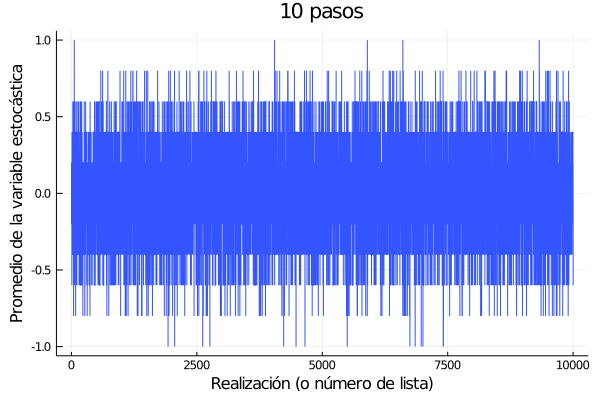

In [12]:
#n=10
listas_10=construir_listas(n[1],L)
promedios_10=promedio_listas(listas_10)
plot(promedios_10,ylabel="Promedio de la variable estocástica", xlabel="Realización (o número de lista)", title="10 pasos", color = "#3354FF",label= false)

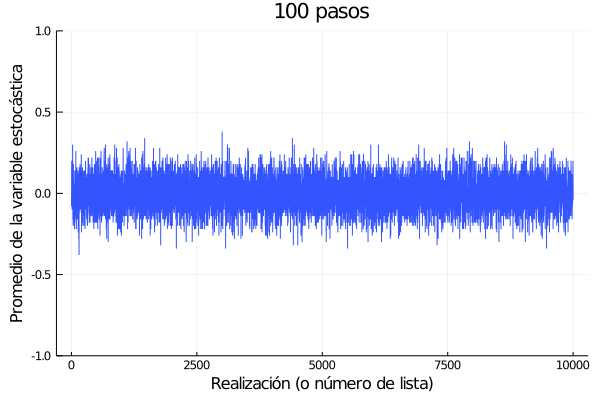

In [13]:
#n=100 
listas_100=construir_listas(n[2],L)
promedios_100=promedio_listas(listas_100)
plot(promedios_100,ylabel="Promedio de la variable estocástica", ylims = (-1,1),xlabel="Realización (o número de lista)", title="100 pasos", color="#3354FF" ,label= false)

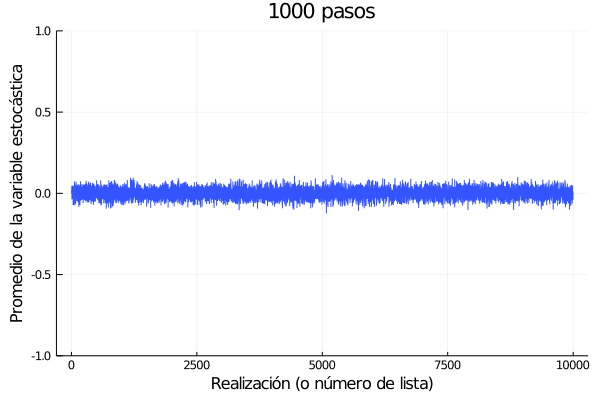

In [14]:
#n=1000
listas_1000=construir_listas(n[3],L)
promedios_1000=promedio_listas(listas_1000)
plot(promedios_1000,ylabel="Promedio de la variable estocástica", ylims = (-1,1),xlabel="Realización (o número de lista)", title="1000 pasos", color="#3354FF" ,label= false)

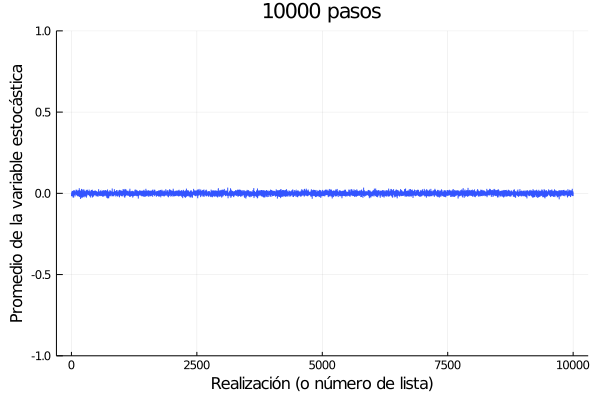

In [15]:
#n=10,000
listas_10000=construir_listas(n[4],L)
promedios_10000=promedio_listas(listas_10000)
plot(promedios_10000,ylabel="Promedio de la variable estocástica", ylims = (-1,1),xlabel="Realización (o número de lista)", title="10000 pasos", color="#3354FF" ,label= false)

# Ejercicio 5. 
### Para cada una de las n’s, obtén el promedio y la varianza del conjunto de listas, i.e., para $n = 10$ tendrás 10,000 listas de 10 pasos, obten el promedio de estas 10,000 listas y luego obten el promedio de esos 10,000 promedios y la varianza de estos 10,000 promedios.

En el ejercicio pasado ya obtuvimos el promedio de las 10, 000 listas para cada valor de n, por lo que a continuación calculamos el promedio de esos 10,000 promedios para cada caso, utilizando la función definida arriba:

In [16]:
prom_1=promedio(promedios_10)
prom_2=promedio(promedios_100)
prom_3=promedio(promedios_1000)
prom_4=promedio(promedios_10000);

Y definimos una lista con los 4 promedios que acabamos de calcular:

In [17]:
lista_promedios=[prom_1,prom_2,prom_3,prom_4]

4-element Array{Float64,1}:
 -0.0016399999999999958 
 -0.00031600000000000004
  5.1000000000000115e-5 
  9.599999999999497e-7  

Repetimos lo anterior, pero ahora con la varianza:

In [18]:
var_1=var(promedios_10)
var_2=var(promedios_100)
var_3=var(promedios_1000)
var_4=var(promedios_10000);

In [19]:
lista_varianzas=[var_1,var_2,var_3,var_4]

4-element Array{Float64,1}:
 0.100623372737274     
 0.009782798423842401  
 0.000980779876987699  
 0.00010045463654205428

**a) Grafica estos promedios como función de $n$ en escala lin-log (es decir, el eje Y en escala lineal y el X en logarítmica).** 

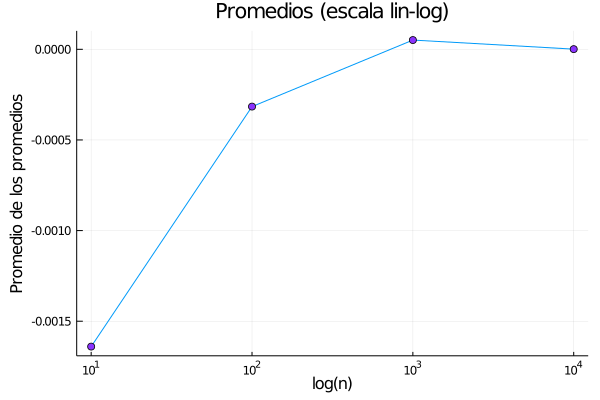

In [20]:
plot(n,lista_promedios, xscale=:log10, ylabel="Promedio de los promedios", xlabel="log(n)", title="Promedios (escala lin-log)",label= false) 
scatter!(n,lista_promedios,xscale=:log10 ,color ="#8A33FF", label=false) 

Grafiquemos nuevamente lo anterior, pero cambiando los límites del eje $y$ para poder apreciar de manera más general la forma de la curva:

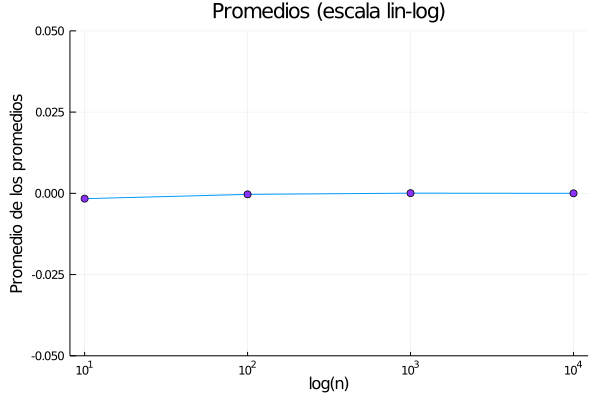

In [22]:
plot(n,lista_promedios, xscale=:log10, ylims=(-0.05,0.05),ylabel="Promedio de los promedios", xlabel="log(n)", title="Promedios (escala lin-log)",label= false) 
scatter!(n,lista_promedios,xscale=:log10 ,color ="#8A33FF", label=false) 

**b) Grafica también cada valor de la varianza como función de $n$ pero en escala log-log.**

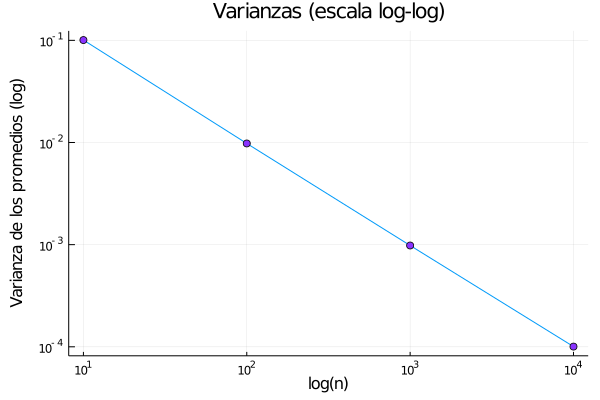

In [23]:
plot(n,lista_varianzas,xscale=:log10,yscale=:log10, xlabel="log(n)", ylabel="Varianza de los promedios (log)",title="Varianzas (escala log-log)",label=false) 
scatter!(n,lista_varianzas,color="#8A33FF",label=false) 

**c) Describe cómo se comparan estos valores para las distintas n’s. Basado en estas observaciones,
si tu objetivo es “sacar un 0”, es decir, escogiendo un valor al azar de alguna de las listas de
modo que lo más probable es que obtengas 0, ¿qué lista escogerías?**

**d) Grafica la varianza multiplicada por n, como función de $n$ en escala lin-log. ¿Qué tipo de curva
obtienes?, ¿por qué?**

Multiplicamos primero cada varianza por su $n$ correspondiente:

In [24]:
var_n=[]
for i in 1:4
    push!(var_n,lista_varianzas[i]*n[i])
end

In [25]:
var_n

4-element Array{Any,1}:
 1.00623372737274  
 0.97827984238424  
 0.980779876987699 
 1.0045463654205429

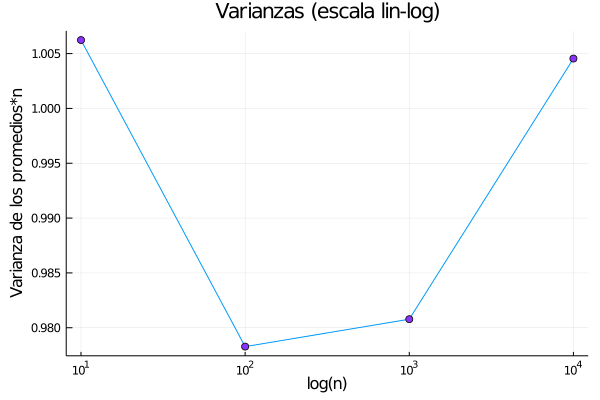

In [26]:
plot(n,var_n,xscale=:log10,xlabel="log(n)", ylabel="Varianza de los promedios*n",title="Varianzas (escala lin-log)",label=false) 
scatter!(n,var_n,xscale=:log10,color="#8A33FF",label=false) 

Nuevamente graficamos lo anterior, pero cambiando los límites del eje $y$ para apreciar mejor su comportamiento:

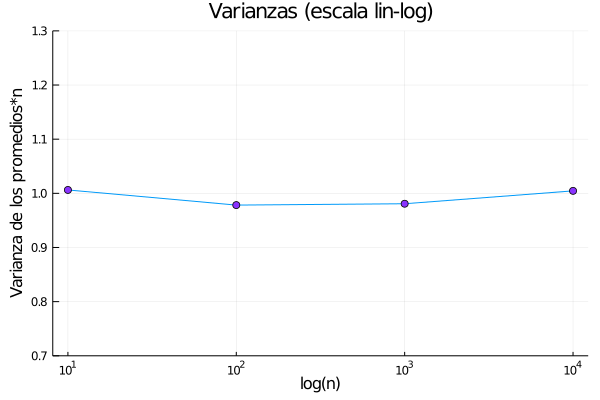

In [28]:
plot(n,var_n,xscale=:log10,xlabel="log(n)", ylims=(0.7,1.3), ylabel="Varianza de los promedios*n",title="Varianzas (escala lin-log)",label=false) 
scatter!(n,var_n,xscale=:log10,color="#8A33FF",label=false)

# Ejercicio 6.
### Para $n = 10, 000$, obtén la varianza de cada conjunto de listas para $L = 10, 100, 1000, 10 000, 100 000$, (éste último salvo que tu computadora se queje, se trabe, se alente o no termine). Grafica la varianza como función de L en escala lin-log. 

Vamos a repetir lo que hicimos en el ejercicio 5, pero ahora fijando el valor de $n$, y variando $L$:

In [29]:
n=10000 #valor de n fijo
L=[10,100,1000,10000];

Construimos las listas para cada valor de $L$, y calculamos el promedio de cada una de ellas:

In [30]:
listas_10=construir_listas(n,L[1])
prom_10=promedio_listas(listas_10);

In [31]:
listas_100=construir_listas(n,L[2])
prom_100=promedio_listas(listas_100);

In [32]:
listas_1000=construir_listas(n,L[3])
prom_1000=promedio_listas(listas_1000);

In [33]:
listas_10000=construir_listas(n,L[4])
prom_10000=promedio_listas(listas_10000);

In [ ]:
#Mi computadora se trabó al intentar con 100,000
#listas_100000=construir_listas(n,100000)
#prom_100000=promedio_listas(listas_100000)

Y obtenemos las varianzas de cada una de ellas:

In [34]:
var_1=var(prom_10)
var_2=var(prom_100)
var_3=var(prom_1000)
var_4=var(prom_10000);

In [35]:
vars=[var_1,var_2,var_3,var_4]

4-element Array{Float64,1}:
 0.000103136           
 0.00010838019797979798
 9.701600476476487e-5  
 0.00010172695957435748

Finalmente, procedemos a graficar la varianza:

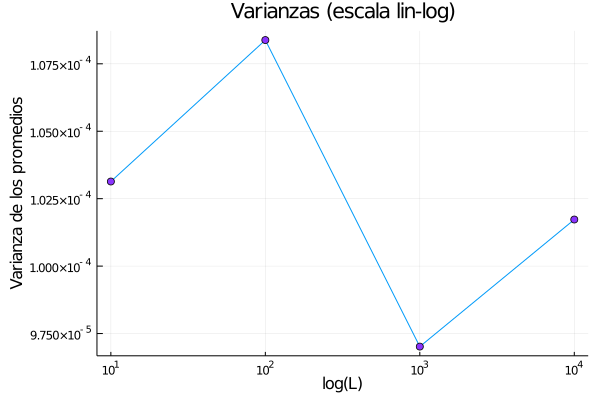

In [36]:
plot(L,vars,xscale=:log10,xlabel="log(L)", ylabel="Varianza de los promedios",title="Varianzas (escala lin-log)",label=false) 
scatter!(L,vars,xscale=:log10,color="#8A33FF",label=false) 

Y volvemos a graficar, cambiando los límites del eje $y$:

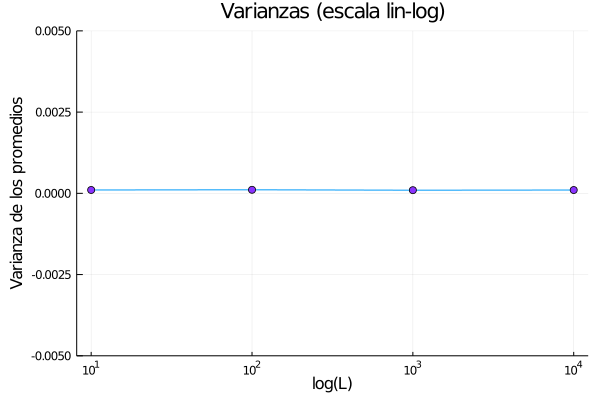

In [38]:
plot(L,vars,xscale=:log10, ylims=(-0.005,0.005),xlabel="log(L)", ylabel="Varianza de los promedios",title="Varianzas (escala lin-log)",label=false) 
scatter!(L,vars,xscale=:log10,color="#8A33FF",label=false) 

**¿Qué observas?, ¿qué puedes concluir de estas observaciones?, ¿qué diferencia encuentras con respecto al comportamiento
de la varianza como función de n para L fija que hiciste arriba? Explica tus resultados.**

# Ejercicio 7. 
### Para el caso $n = 10, 000$ y $L = 10, 000$ (Ejercicio 4):
**a) Construye un histograma de los valores de $X$, es decir, encuentra la distribución de los valores de $X$. Para visualizarlo mejor, te recomiendo construir los histogramas comenzando en -0.1 con tamaño de bin de 0.002 y un total de 100 bins.**

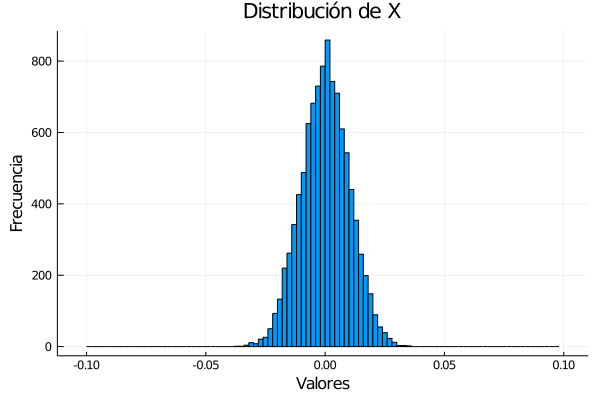

In [40]:
intervalos=range(-0.1,step=0.002,length=100) #100 bins, con tamaño de 0.002 comenzando en -0.1
histogram(promedios_10000,title="Distribución de X",bins=intervalos,ylabel="Frecuencia",xlabel="Valores",label=false)

**b) ¿A qué tipo de distribución se asemeja?**

Observamos que se asemeja a una distribución normal, lo que corresponde con lo que sabemos por el teorema del límite central, i.e. conforme más variables independientes tengamos, la distribución más tenderá a ser una distribución normal. 